In [60]:
#Below are some useful libraries for later purpose task
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings 

warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [27]:
data = pd.read_csv('tweet_text_emotion.csv')

In [28]:
data.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [29]:
#Data PreProcessing Steps
#Step 0 : Removing twitter handles 

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 

In [30]:
#Step 1 : Removing twitter handles 
data['tidy_tweet'] = np.vectorize(remove_pattern)(data['content'], "@[\w]*")

In [31]:
#Step 2: Removing Punctuations, Numbers, and Special Characters
data['tidy_tweet'] = data['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

In [32]:
#Step 3 : Removing Short Words having length 2 or less
data['tidy_tweet'] = data['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

In [33]:
#Tokenization Step
tokenized_tweet = data['tidy_tweet'].apply(lambda x: x.split())


In [34]:
#Stemming Step exp “ing”, “ly”, “es”, “s” etc) 
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [35]:
tokenized_tweet.head()

0    [know, wa, listenin, bad, habit, earlier, and,...
1    [layin, bed, with, headach, ughhhh, waitin, yo...
2                    [funer, ceremoni, gloomi, friday]
3                [want, hang, out, with, friend, soon]
4    [want, trade, with, someon, who, ha, houston, ...
Name: tidy_tweet, dtype: object

In [36]:
#Getting tokenized tweet back to dataset
for i in range( len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

data['tidy_tweet'] = tokenized_tweet

In [43]:
#Encoding output labels 'sadness' as '1' & 'happiness' as '0'
#from sklearn import preprocessing
#lbl_enc = preprocessing.LabelEncoder()
#y = lbl_enc.fit_transform(data.sentiment.values)

In [51]:
data.head()

,tweet_id,sentiment,content,tidy_tweet
1,1956967666,1,Layin n bed with a headache ughhhh...waitin o...,layin bed with headach ughhhh waitin your call
2,1956967696,1,Funeral ceremony...gloomy friday...,funer ceremoni gloomi friday
6,1956968487,1,"I should be sleep, but im not! thinking about ...",should sleep but not think about old friend wh...
8,1956969035,1,@charviray Charlene my love. I miss you,charlen love miss you
9,1956969172,1,@kelcouch I'm sorry at least it's Friday?,sorri least friday


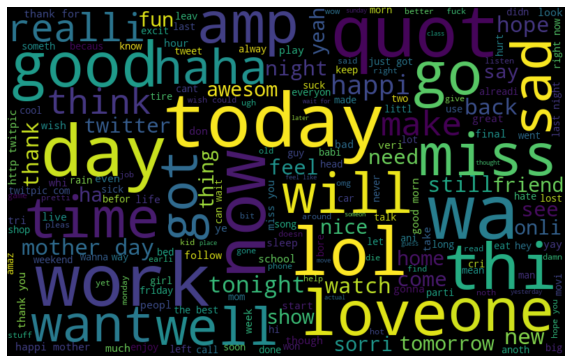

In [54]:
#Visualization of our dataset
#Common Words used in tweets : wordCloud
all_words = ' '.join([text for text in data['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

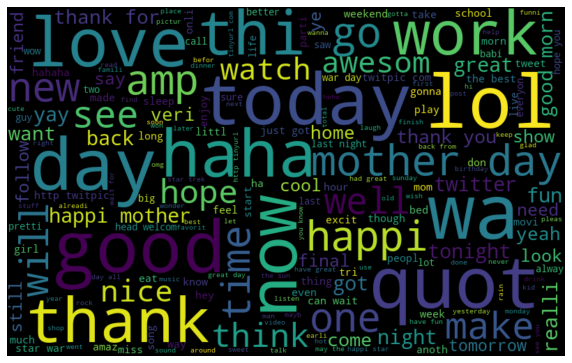

In [55]:
#Words in Happiness tweets
normal_words =' '.join([text for text in data['tidy_tweet'][data['sentiment'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

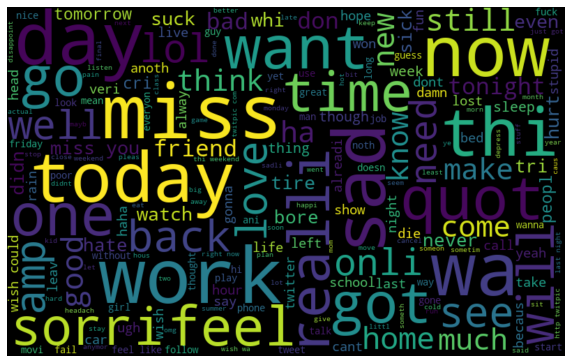

In [56]:
#words used in sadness tweets
negative_words = ' '.join([text for text in data['tidy_tweet'][data['sentiment'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [57]:
#Understanding Impact of hashtags in tweets sentiment
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [58]:
# extracting hashtags from Happiness 

HT_regular = hashtag_extract(data['tidy_tweet'][data['sentiment'] == 0])

# extracting hashtags from sadness tweets

HT_negative = hashtag_extract(data['tidy_tweet'][data['sentiment'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

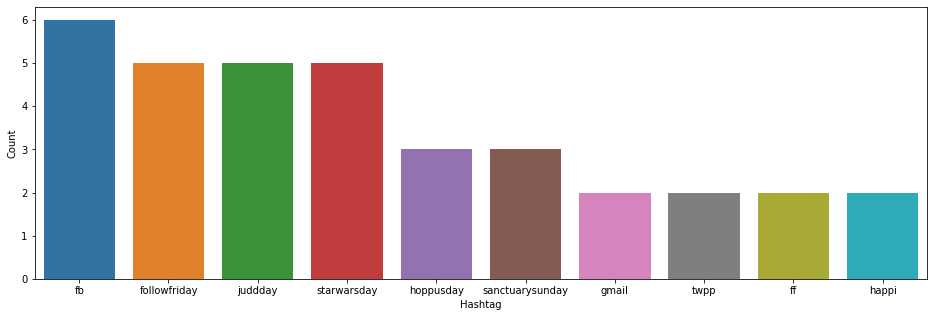

In [61]:
#For happiness
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

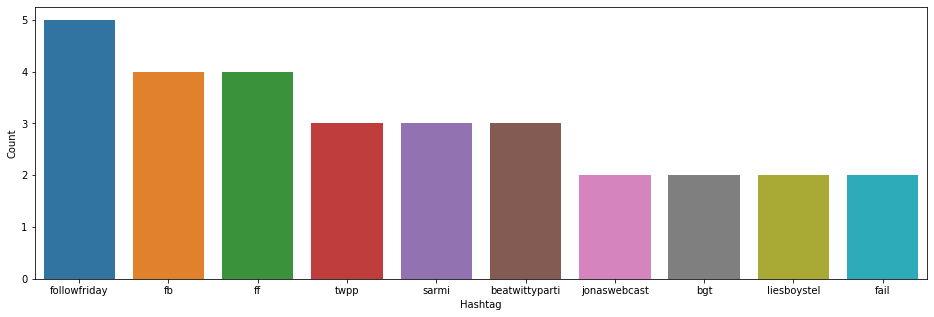

In [62]:
#For Sadness

b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [102]:
#Converting text into numeric features
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(stop_words="english", binary=True)

# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(data['tidy_tweet'])

In [103]:
bow.shape

(10374, 10291)

In [114]:
#Building model using Bag of words from Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


#60% train, 20% valid, 20%test
x_train, x_test, y_train, y_test = train_test_split(bow, data['sentiment'], test_size=0.2, random_state=42)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

lreg = LogisticRegression()

lreg.fit(x_train, y_train) # training the model

#prediction = lreg.predict_proba(x_val )
prediction= lreg.predict(x_val)

prediction_int = prediction.astype(np.int)

print("For Validation")

print("F1 Score : %.5f" %f1_score(y_val, prediction_int)) # calculating f1 score

print("Accuracy Score : %.5f"% accuracy_score(y_val, prediction_int)) #calculating accuracy score



For Validation
F1 Score : 0.78287
Accuracy Score : 0.78747


/home/jalal/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [115]:
#For Testing

test_pred=lreg.predict(x_test)

test_pred_int = test_pred.astype(np.int)

print("For Validation")

print("F1 Score : %.5f" %f1_score(y_test, test_pred_int)) # calculating f1 score

print("Accuracy Score : %.5f"% accuracy_score(y_test, test_pred_int)) #calculating accuracy score



For Validation
F1 Score : 0.79826
Accuracy Score : 0.79855


In [117]:
"""
#Saving our trained Logistic Regression Model
import joblib 

# Save the model as a pickle in a file 
joblib.dump(lreg, "Models/Logistic_Reg.pkl") 

#Saving our countvectorizer as well 
joblib.dump(bow_vectorizer, "Features/countVectorizer.pkl")
"""

['Features/countVectorizer.pkl']

In [116]:

#import dill
#dill.load_session('Original.db')
#dill.dump_session('Original.db')
